In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train_bigmart.csv")
test = pd.read_csv("test_bigmart.csv")

In [3]:
train['source'] = 'train'
test['source'] = 'test'

In [4]:
data = pd.concat([train,test],ignore_index=True)
data_vk = data.copy()

In [5]:
data.shape

(14204, 13)

In [6]:
train.shape

(8523, 13)

In [7]:
test.shape

(5681, 12)

In [8]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [9]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [10]:
categorical_col = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#excluding ids and source
categorical_col = [x for x in categorical_col if x not in ["Item_Identifier","source","Outlet_Identifier"]]

In [11]:
for col in categorical_col:
    print("\nFreq of categories ",col)
    print(data[col].value_counts())


Freq of categories  Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Freq of categories  Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Freq of categories  Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Freq of categories  Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Freq of categories  Outlet_Type
Supermarket Type1    9294
Grocery

In [12]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [13]:
data[data.Item_Weight.isnull()]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
18,Low Fat,DRI11,113.2834,2303.6680,Hard Drinks,0.034238,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
21,Regular,FDW12,144.5444,4064.0432,Baking Goods,0.035400,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
23,Low Fat,FDC37,107.6938,214.3876,Baking Goods,0.057557,NaN,1985,OUT019,Tier 1,Small,Grocery Store,train
29,Regular,FDC14,43.6454,125.8362,Canned,0.072222,NaN,1985,OUT019,Tier 1,Small,Grocery Store,train
36,Regular,FDV20,128.0678,2797.6916,Fruits and Vegetables,0.059512,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
38,Regular,FDX10,36.9874,388.1614,Snack Foods,0.123111,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
39,Low Fat,FDB34,87.6198,2180.4950,Snack Foods,0.026481,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
49,Regular,FDS02,196.8794,780.3176,Dairy,0.255395,NaN,1985,OUT019,Tier 1,Small,Grocery Store,train
59,Low Fat,FDI26,180.0344,892.1720,Canned,0.061082,NaN,1985,OUT019,Tier 1,Small,Grocery Store,train


In [14]:
data.groupby("Item_Type")["Item_Weight"].mean()

Item_Type
Baking Goods             12.275211
Breads                   11.152362
Breakfast                13.179112
Canned                   12.340830
Dairy                    13.238358
Frozen Foods             12.569323
Fruits and Vegetables    13.194406
Hard Drinks              11.576205
Health and Hygiene       13.171739
Household                13.337977
Meat                     12.766104
Others                   13.915724
Seafood                  12.760274
Snack Foods              12.865732
Soft Drinks              11.788408
Starchy Foods            13.659758
Name: Item_Weight, dtype: float64

In [15]:
data.groupby("Item_Type")["Item_Weight"].mean()

Item_Type
Baking Goods             12.275211
Breads                   11.152362
Breakfast                13.179112
Canned                   12.340830
Dairy                    13.238358
Frozen Foods             12.569323
Fruits and Vegetables    13.194406
Hard Drinks              11.576205
Health and Hygiene       13.171739
Household                13.337977
Meat                     12.766104
Others                   13.915724
Seafood                  12.760274
Snack Foods              12.865732
Soft Drinks              11.788408
Starchy Foods            13.659758
Name: Item_Weight, dtype: float64

In [16]:
weight_fill = data.groupby("Item_Type")["Item_Weight"].mean().to_frame()
weight_fill = weight_fill.reset_index()

In [17]:
for index in data[data.Item_Weight.isnull()].index:
    mean = weight_fill[(weight_fill.Item_Type == data.iloc[index]["Item_Type"])]["Item_Weight"].values[0]
    data.set_value(index,"Item_Weight",mean)

In [18]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [19]:
abc = data_vk.groupby("Item_Identifier")["Item_Weight"].mean().to_frame()

In [20]:
abc = abc.reset_index()

In [21]:
for index in data_vk[data_vk.Item_Weight.isnull()].index:
    mean = abc[(abc.Item_Identifier == data_vk.iloc[index]['Item_Identifier'])]['Item_Weight'].values[0]
    data_vk.set_value(index,'Item_Weight',mean)

In [22]:
data.Outlet_Size.mode()

0    Medium
dtype: object

In [23]:
outlet_size_mode = data_vk.groupby("Outlet_Type").Outlet_Size.apply(lambda x:x.mode()).to_frame()

In [24]:
outlet_size_mode = outlet_size_mode.reset_index()

In [25]:
outlet_size_mode

,Outlet_Type,level_1,Outlet_Size
0,Grocery Store,0,Small
1,Supermarket Type1,0,Small
2,Supermarket Type2,0,Medium
3,Supermarket Type3,0,Medium


In [26]:
for index in data_vk[data_vk.Outlet_Size.isnull()].index:
    mode = outlet_size_mode[(outlet_size_mode.Outlet_Type == data_vk.iloc[index]['Outlet_Type'])]['Outlet_Size'].values[0]
    data_vk.set_value(index,'Outlet_Size',mode)

In [27]:
data_vk.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

In [28]:
data_vk.groupby("Outlet_Type").Item_Outlet_Sales.mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [29]:
sum(data_vk["Item_Visibility"] ==0)

879

In [30]:
vis_mean = data_vk.groupby("Item_Identifier").Item_Visibility.mean().to_frame()

In [31]:
vis_mean = vis_mean.reset_index()

In [32]:
data_vk[data_vk["Item_Visibility"]==0].index

Int64Index([    3,     4,     5,    10,    32,    33,    46,    60,    72,
               79,
            ...
            14120, 14126, 14134, 14137, 14158, 14166, 14171, 14177, 14184,
            14202],
           dtype='int64', length=879)

In [33]:
for index in data_vk[data_vk["Item_Visibility"]==0].index:
    mean = vis_mean[(vis_mean.Item_Identifier == data_vk.iloc[index]['Item_Identifier'])]['Item_Visibility'].values[0]
    data_vk.set_value(index,'Item_Visibility',mean)

In [34]:
sum(data_vk["Item_Visibility"]==0)
#Perf.

0

In [35]:
visibility_avg_v2 = data_vk.pivot_table(values="Item_Visibility",columns="Item_Identifier")

In [36]:
data_vk["Item_Visibility_Mean_Ratio"] = data_vk.apply(lambda x: x["Item_Visibility"]/visibility_avg_v2[x["Item_Identifier"]],axis=1)

In [37]:
data_vk.Item_Visibility_Mean_Ratio.describe()

count    14204.000000
mean         1.000000
std          0.207021
min          0.600000
25%          0.879677
50%          0.928859
75%          0.999070
max          1.806056
Name: Item_Visibility_Mean_Ratio, dtype: float64

In [38]:
data_vk["Item_Identifier_Prefix"] = data_vk.Item_Identifier.str.extract("([A-Z]{2})",expand=False)

In [39]:
data_vk.Item_Identifier_Prefix.unique()
#Only 3 categories that is FD - Food, DR - Drinks, NC - NonConsumables.]

array(['FD', 'DR', 'NC'], dtype=object)

In [40]:
data_vk.Item_Identifier_Prefix = data_vk.Item_Identifier_Prefix.map({"FD":"Food","DR":"Drinks","NC":"Non-consumable"})

In [41]:
data_vk.Item_Identifier_Prefix.value_counts()

Food              10201
Non-consumable     2686
Drinks             1317
Name: Item_Identifier_Prefix, dtype: int64

In [42]:
#Creating feature Years of Operation - 
data_vk["Outlet_Years"] = 2013 - data_vk["Outlet_Establishment_Year"]
data_vk["Outlet_Years"].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [43]:
#Fix the unsimiliarities in Item_Fat_Content column.
data_vk.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [44]:
data_vk.Item_Fat_Content = data_vk.Item_Fat_Content.map({"low fat":"Low Fat","LF":"Low Fat","reg":"Regular","Low Fat":"Low Fat","Regular":"Regular"})

In [45]:
data_vk.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [46]:
data_vk["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [47]:
data_vk.loc[(data_vk["Item_Fat_Content"] == "Low Fat") & (data_vk["Item_Identifier_Prefix"] == "Non-consumable")]
#This shows that being NC they have Fat values.

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_Mean_Ratio,Item_Identifier_Prefix,Outlet_Years
4,Low Fat,NCD19,53.8614,994.7052,Household,0.009780,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train,0.750000,Non-consumable,26
16,Low Fat,NCB42,115.3492,1621.8888,Health and Hygiene,0.008596,11.800,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,1.003140,Non-consumable,4
22,Low Fat,NCB30,196.5084,1587.2672,Household,0.025698,14.600,2004,OUT035,Tier 2,Small,Supermarket Type1,train,0.862894,Non-consumable,9
25,Low Fat,NCD06,45.9060,838.9080,Household,0.099887,13.000,2007,OUT017,Tier 2,Small,Supermarket Type1,train,0.927507,Non-consumable,6
31,Low Fat,NCS17,96.4436,2741.7644,Health and Hygiene,0.080829,18.600,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,1.003140,Non-consumable,4
35,Low Fat,NCX29,146.7102,3791.0652,Health and Hygiene,0.089291,10.000,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.876089,Non-consumable,14
46,Low Fat,NCP05,153.3024,2428.8384,Health and Hygiene,0.018757,19.600,2002,OUT045,Tier 2,Small,Supermarket Type1,train,0.750000,Non-consumable,11
50,Low Fat,NCL17,143.8812,3134.5864,Health and Hygiene,0.067780,7.390,1997,OUT046,Tier 1,Small,Supermarket Type1,train,0.874729,Non-consumable,16
54,Low Fat,NCP18,151.4708,4815.0656,Household,0.028760,12.150,2007,OUT017,Tier 2,Small,Supermarket Type1,train,0.927507,Non-consumable,6
56,Low Fat,NCX54,106.1622,2117.2440,Household,0.048157,9.195,2002,OUT045,Tier 2,Small,Supermarket Type1,train,0.931518,Non-consumable,11


In [48]:
data_vk.loc[(data_vk["Item_Fat_Content"] == "Regular") & (data_vk["Item_Identifier_Prefix"] == "Non-consumable")]
#whereas they dont have any Regular Fat values.

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_Mean_Ratio,Item_Identifier_Prefix,Outlet_Years


In [49]:
#Let us consider these values as Non-edible and fill it in Item_Fat_Content.
data_vk.loc[data_vk["Item_Identifier_Prefix"]=="Non-consumable","Item_Fat_Content"] = "Non-edible"

In [50]:
data_vk.Item_Fat_Content.value_counts()

Low Fat       6499
Regular       5019
Non-edible    2686
Name: Item_Fat_Content, dtype: int64

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le = LabelEncoder()

In [53]:
data_abc = data_vk.copy()

In [54]:
var_mod = ["Item_Fat_Content","Outlet_Location_Type","Outlet_Size","Item_Identifier_Prefix","Outlet_Type"]
data_abc = pd.get_dummies(data_abc,columns=var_mod)

In [55]:
data_abc = pd.get_dummies(data_abc,columns=["Outlet_Identifier"])

In [56]:
data_abc["Outlet_Identifier"] = data["Outlet_Identifier"]
data_abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 37 columns):
Item_Identifier                          14204 non-null object
Item_MRP                                 14204 non-null float64
Item_Outlet_Sales                        8523 non-null float64
Item_Type                                14204 non-null object
Item_Visibility                          14204 non-null float64
Item_Weight                              14204 non-null float64
Outlet_Establishment_Year                14204 non-null int64
source                                   14204 non-null object
Item_Visibility_Mean_Ratio               14204 non-null float64
Outlet_Years                             14204 non-null int64
Item_Fat_Content_Low Fat                 14204 non-null uint8
Item_Fat_Content_Non-edible              14204 non-null uint8
Item_Fat_Content_Regular                 14204 non-null uint8
Outlet_Location_Type_Tier 1              14204 non-null uint8
Outlet_Loca

In [57]:
data_abc = data_abc.drop(["Item_Type","Outlet_Establishment_Year"],axis=1)

In [58]:
train_mod = data_abc.loc[data_abc.source == 'train']
test_mod = data_abc.loc[data_abc.source == 'test']

In [59]:
test_mod = test_mod.drop(["Item_Outlet_Sales","source"],axis=1)
train_mod = train_mod.drop(["source"],axis=1)

In [60]:
train_mod.to_csv("train_mod.csv",index=False)
test_mod.to_csv("test_mod.csv",index=False)

In [61]:
#Function to fit model - 
target = "Item_Outlet_Sales"
IDcol = ["Item_Identifier","Outlet_Identifier"]
from sklearn import cross_validation,metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fitting the algorithm - 
    alg.fit(dtrain[predictors],dtrain[target])
    
    #Predict Training set - 
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    #perform cross-val - 
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring="mean_squared_error")
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model - 
    print("Model Report\n")
    print("RMSE : ",np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    
    #Predict Test Data - 
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file :
    
    IDcol.append(target)
    submission = pd.DataFrame({x: dtest[x] for x in IDcol})
    submission.to_csv(filename,index=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
predictors = [x for x in train_mod.columns if x not in [target]+IDcol]

In [92]:
alg = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=100, n_jobs=-1, random_state=13)
modelfit(alg, train_mod, test_mod, predictors, target, IDcol,"rand_sub.csv")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\sit

Model Reprot

RMSE :  1073.695401


In [74]:
#1154.0286931136

In [94]:
alg = RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf=100, n_jobs=-1, random_state=13)
modelfit(alg, train_mod, test_mod, predictors, target, IDcol,"rand_sub_1.csv")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\sit

Model Reprot

RMSE :  1068.04183331


In [ ]:
#1153.080542394 -BEST.

In [96]:
alg = RandomForestRegressor(n_estimators=800, max_depth=6, min_samples_leaf=100, n_jobs=-1, random_state=13)
modelfit(alg, train_mod, test_mod, predictors, target, IDcol,"rand_sub_1.csv")

Model Reprot

RMSE :  1067.90268105


In [75]:
#1153.27381035228

In [97]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

from sklearn import cross_validation, metrics

In [98]:
model = RandomForestRegressor(n_jobs=-1,random_state=13)

In [105]:
features =train_mod.columns.drop(["Item_Identifier","Item_Outlet_Sales","Outlet_Identifier"],1)

In [108]:
model.fit(train_mod[features],train_mod[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=13, verbose=0, warm_start=False)

In [109]:
predictions = model.predict(train_mod[features])

In [110]:
cv_score = cross_validation.cross_val_score(model, train_mod[features], train_mod[target], cv=20, scoring="mean_squared_error")

In [112]:
cv_score = np.sqrt(np.abs(cv_score))

In [117]:
cv_score.mean()

1162.8898361350896

In [124]:
from math import sqrt

sqrt(metrics.mean_squared_error(train_mod.Item_Outlet_Sales,predictions))

499.86334905100466

In [126]:
from sklearn.grid_search import GridSearchCV
from time import time

In [133]:
param_grid = {
                "n_estimators":np.arange(2,600,10),
                "max_depth": np.arange(1,28,1),
                "min_samples_split": np.arange(2,150,1),
                "min_samples_leaf": np.arange(1,100,2),
                "max_leaf_nodes": np.arange(2,100,2),
                "min_weight_fraction_leaf": np.arange(0.1,0.4,0.1)
}

In [134]:
def eval_param(parameter, num_range, index):
    grid_search = GridSearchCV(model, param_grid={parameter: num_range})
    grid_search.fit(train_mod[features], train_mod[target])
    
    df = {}
    for i,score in enumerate(grid_search.grid_scores_):
        df[score[0][parameter]] = score[1]
        
    df = pd.DataFrame.from_dict(df, orient='index')
    df.reset_index(level=0,inplace=True)
    df = df.sort_values(by='index')
    
    plt.subplot(3,2,index)
    plot = plt.plot(df['index'], df[0])
    plt.title(parameter)
    return plot, df
    

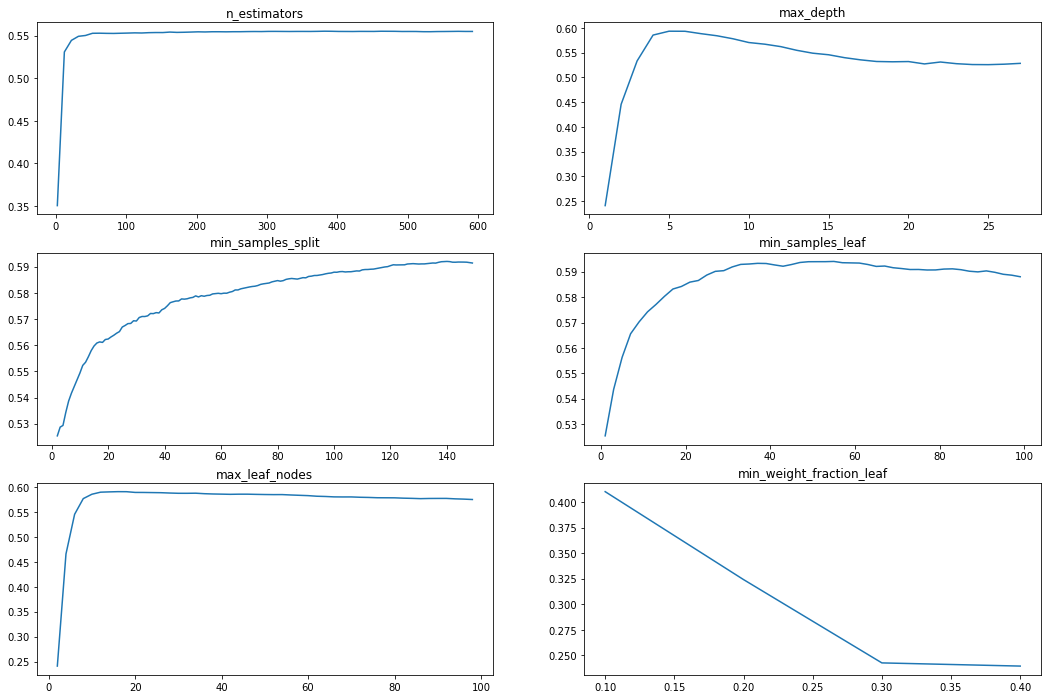

In [135]:
index =1
plt.figure(figsize=(18,12))
for parameter,param_range in dict.items(param_grid):
    eval_param(parameter, param_range, index)
    index += 1

In [136]:
param_grid2 = {
            "n_estimators":[200,300,400],
            "max_depth":[5,6],
            "min_samples_leaf":[39,40,45,50],
            "min_samples_split":[100,110,120,135,150],
            "max_leaf_nodes":[9,10,11,12,13]
}

In [137]:
from operator import itemgetter

# Utility function to report best scores
def report(grid_scores, n_top):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.4f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

In [138]:
grid_search = GridSearchCV(model,param_grid=param_grid2)
grid_search.fit(train_mod[features],train_mod[target])

report(grid_search.grid_scores_,5)

Model with rank: 1
Mean validation score: 0.5934)
Parameters: {'max_depth': 6, 'max_leaf_nodes': 13, 'min_samples_leaf': 40, 'min_samples_split': 110, 'n_estimators': 200}

Model with rank: 2
Mean validation score: 0.5934)
Parameters: {'max_depth': 5, 'max_leaf_nodes': 13, 'min_samples_leaf': 40, 'min_samples_split': 120, 'n_estimators': 200}

Model with rank: 3
Mean validation score: 0.5934)
Parameters: {'max_depth': 6, 'max_leaf_nodes': 13, 'min_samples_leaf': 40, 'min_samples_split': 120, 'n_estimators': 200}

Model with rank: 4
Mean validation score: 0.5934)
Parameters: {'max_depth': 5, 'max_leaf_nodes': 13, 'min_samples_leaf': 40, 'min_samples_split': 110, 'n_estimators': 200}

Model with rank: 5
Mean validation score: 0.5934)
Parameters: {'max_depth': 5, 'max_leaf_nodes': 13, 'min_samples_leaf': 39, 'min_samples_split': 120, 'n_estimators': 200}



In [69]:
model = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=40, min_samples_split=110)#max_leaf_nodes=13)
#1153.71399647781

In [70]:
modelfit(model, train_mod, test_mod, predictors, target, IDcol,"rand_gd_1.csv")

Model Report

RMSE :  1060.89611181


In [68]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
model = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=40, min_samples_split=100)#max_leaf_nodes=13)
#1153.95729596931

In [73]:
modelfit(model, train_mod, test_mod, predictors, target, IDcol,"rand_gd_1.csv")

Model Report

RMSE :  1060.06228984


In [76]:
model = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=40, min_samples_split=120)#max_leaf_nodes=13)
modelfit(model, train_mod, test_mod, predictors, target, IDcol,"rand_gd_1.csv")

Model Report

RMSE :  1061.59513009


In [77]:
#1153.58231460003

In [78]:
model = RandomForestRegressor(n_estimators=500,max_depth=6, min_samples_leaf=40, min_samples_split=120)#max_leaf_nodes=13)
modelfit(model, train_mod, test_mod, predictors, target, IDcol,"rand_gd_1.csv")

Model Report

RMSE :  1061.59441428


In [79]:
#1153.76029105798

In [80]:
model = RandomForestRegressor(n_estimators=300,max_depth=6, min_samples_leaf=40, min_samples_split=120)#max_leaf_nodes=13)
modelfit(model, train_mod, test_mod, predictors, target, IDcol,"rand_gd_1.csv")

Model Report

RMSE :  1061.71828903


In [81]:
#1153.68957358671